In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from typing import Dict
from tqdm import tqdm
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
#Stopwords currently used from nltk, but custom list would be better (e.g. top 1000 ASR'd words)
import nltk 
nltk.download('stopwords') #<-  Likely need this
stop_words = stopwords.words('english')
stop_words.extend(['unk', 'NULL'])
stop_words.head()

In [ ]:
#function to calculate how often a term maps to junk.  Normalized by # of junk words, as each one adds up to 100%
def get_junk_translations(term: str, tpm: Dict[str, Dict[str, float]]) -> float:
    stopwords = stop_words
    total = 0.0
    count = 0
    for alignment in stopwords:
        if alignment in tpm[term]:
            count += 1
            total += tpm[term][alignment]
    if count != 0:    
        total = total/count
    return total

#read the translation matrix.  Precomputed with Gyza.
def read_translation_probability_matrix(fp) -> Dict[str, Dict[str, float]]:
    probabilities = defaultdict(lambda: defaultdict(float))
    for line in tqdm(fp):
        w1, w0, prob = line.strip().split()
        probabilities[w0][w1] = float(prob)
    return probabilities
    
lex_file = '/fs/clip-scratch/yogarshi/qanta-joe/align-try2/train/lex.f2e'

with open('/fs/clip-scratch/yogarshi/qanta-joe/align/sentences.txt.cln') as fp:
    data = [l for l in fp]
    
tpm = read_translation_probability_matrix(open(lex_file))

In [116]:
#example of tpm
tpm['hello']

defaultdict(float,
            {'NULL': 0.0425532,
             'although': 0.0212766,
             'define': 0.0212766,
             'halo': 0.0212766,
             'hell': 0.0212766,
             'hello': 0.7234043,
             'how': 0.0212766,
             'quote': 0.0212766,
             'thirteen': 0.0212766,
             'unk': 0.0851064})

In [62]:
#Code to analyze mappings
z = term_frequencies[0]
for ix, val in enumerate(z == 1000):
    if val and ix > 10000 and 'unk' in tpm[vocab[ix]]: #
        print(vocab[ix], tpm[vocab[ix]])
        count += 1
        if count == 10000:
            break        

In [ ]:
c = CountVectorizer()

# fit_transform returns a scipy sparse matrix of dimensions:
#  (number_of_documents, vocab_size)
fitted = c.fit_transform(data)
term_frequencies = np.array(fitted.sum(0)[0])

vocab = ['']*len(c.vocabulary_.keys())
for word, ix in c.vocabulary_.items():
    vocab[ix] = word

array_of_junk_translations = np.array([
    get_junk_translations(term, tpm) for term in tqdm(vocab)
])

### Jitter is necessary as many points overlap at exact same spot.  Alpha value in plt.scatter() also helps scope frequency.  

In [14]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

Text(0.5,1,'Information Lost per Word Rank')

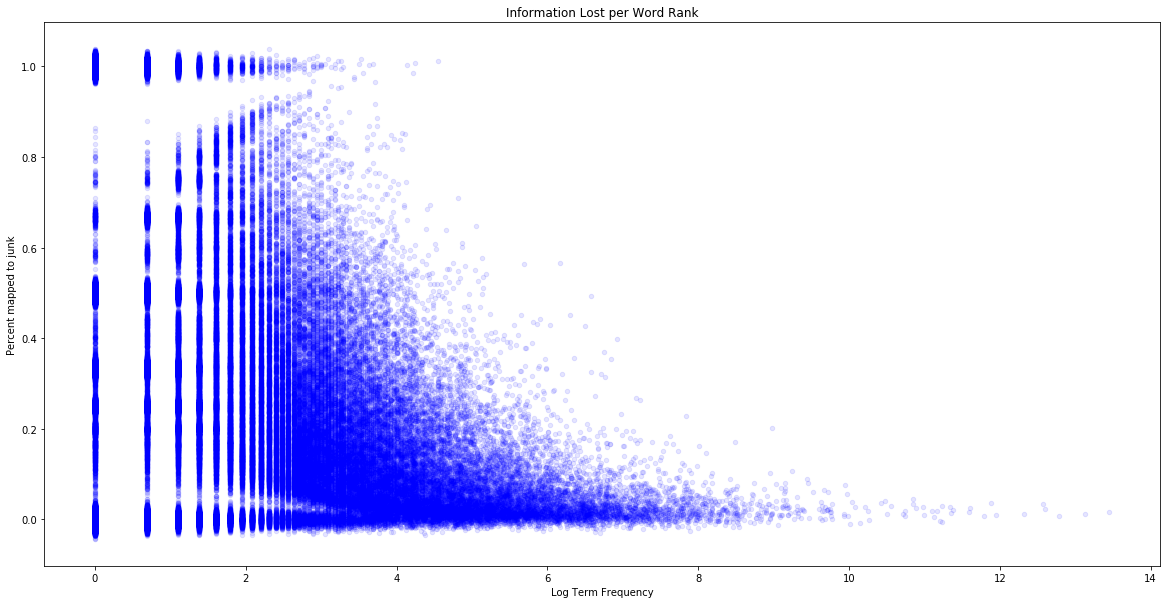

In [121]:
#Plot the data

plt.figure(figsize=(20,10))
jitter(np.log(term_frequencies), array_of_junk_translations, alpha=0.1, )
plt.xlabel('Log Term Frequency')
#plt.xlim(left = 0, right = 100)
plt.ylabel('Percent mapped to junk')
plt.title('Information Lost per Word Rank')

### Alignment between term_frequencies and junk seems to make sense

In [62]:
print(term_frequencies[0][:100])
print(array_of_junk_translations[0:100])

[  17 1248    4    1    1    1    2    6    1    4    3    1    1    8
    1    3    1    1    1    4    1    1    1   13   10    2    1    1
    1    3    2    1    9    2    1    2    5    1    1    1    1    1
    5    1    1    1    6    1    1    1    8    6    2    2    1    1
    1    1    1    1    1    1    1    1    4  507  102    1    6    1
    2    2    1    1    2    1    2    1    1    1    1    2   14   39
    3    1    1    1    5    1    4    2    1    2   11   21    3    3
    4    4]
[0.        0.0014706 0.0037477 0.0074791 0.        0.0159374 0.
 0.0012484 0.        0.0052609 0.        0.        0.        0.
 0.0067734 0.0286615 0.        0.0336581 0.        0.        0.0025773
 0.        0.        0.        0.0015773 0.0061412 0.        0.
 0.        0.0038023 0.0062461 0.        0.0044586 0.0005914 0.0037334
 0.        0.        0.        0.        0.        0.        0.0128205
 0.        0.        0.        0.        0.0095694 0.0060203 0.0119048
 0.        0.  